In [14]:
##Exploratory Data Analysis
##Probability of Customer Credit Default Data Set 

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 


In [13]:
#Import Data
credit = pd.read_csv('defaultcc.csv', header = 0)
credit1 = pd.read_csv('defaultccNUM.csv', header = 0)
cc1 = credit1

ccORD = pd.read_csv('OrdinalValuesDefaultCC.csv')

In [5]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAST_PAY1,PAST_PAY2,PAST_PAY3,PAST_PAY4,PAST_PAY5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
#examine data
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAST_PAY1,PAST_PAY2,PAST_PAY3,PAST_PAY4,PAST_PAY5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.779867,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.728486,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,3.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [152]:
#identify values 
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAST_PAY1    30000 non-null int64
PAST_PAY2    30000 non-null int64
PAST_PAY3    30000 non-null int64
PAST_PAY4    30000 non-null int64
PAST_PAY5    30000 non-null int64
PAST_PAY6    30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULTED    30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [6]:
cc = pd.read_csv("defaultcc.csv", header = 0)

In [10]:
cc.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAST_PAY1,PAST_PAY2,PAST_PAY3,PAST_PAY4,PAST_PAY5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
cc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL     30000 non-null int64
SEX           30000 non-null int64
EDUCATION     30000 non-null int64
MARRIAGE      30000 non-null int64
AGE           30000 non-null int64
PAST_PAY_1    30000 non-null int64
PAST_PAY_2    30000 non-null int64
PAST_PAY_3    30000 non-null int64
PAST_PAY_4    30000 non-null int64
PAST_PAY_5    30000 non-null int64
PAST_PAY_6    30000 non-null int64
BILL_AMT1     30000 non-null int64
BILL_AMT2     30000 non-null int64
BILL_AMT3     30000 non-null int64
BILL_AMT4     30000 non-null int64
BILL_AMT5     30000 non-null int64
BILL_AMT6     30000 non-null int64
PAY_AMT1      30000 non-null int64
PAY_AMT2      30000 non-null int64
PAY_AMT3      30000 non-null int64
PAY_AMT4      30000 non-null int64
PAY_AMT5      30000 non-null int64
PAY_AMT6      30000 non-null int64
defaulted     30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [4]:
import matplotlib.pyplot as plt

In [7]:
#SHOW COLUMN NAMES#

header = cc.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAST_PAY1',
       'PAST_PAY2', 'PAST_PAY3', 'PAST_PAY4', 'PAST_PAY5', 'PAST_PAY6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'DEFAULTED'],
      dtype='object')


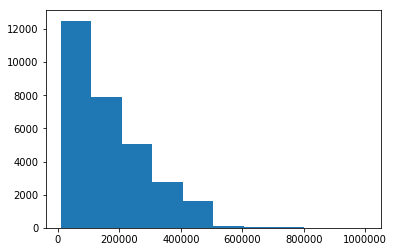

In [11]:
#BUILD HISTOGRAM#

plt.hist(cc['LIMIT_BAL'])
plt.show()

#Shows the value of Limit Balance throughout the entire data set

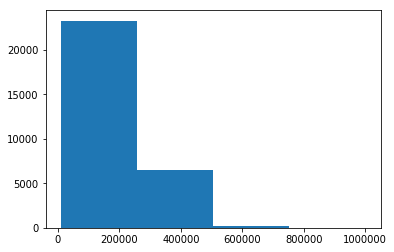

In [160]:
#Histogram with 4 bins 

plt.hist(cc['LIMIT_BAL'], bins = 4)
plt.show()


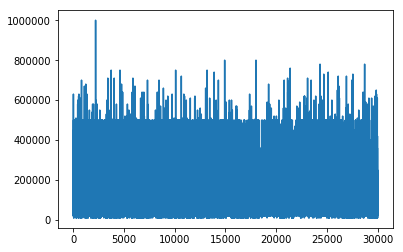

In [161]:
#LINE PLOT GRAPH#

plt.plot(cc['LIMIT_BAL'])
print()

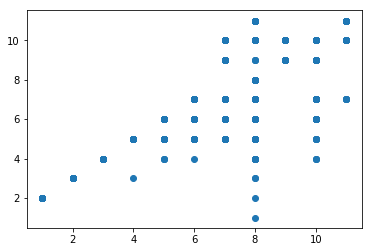

In [12]:
##Scatter PLot##

x = ccORD['PAST_PAY_1']
y = ccORD['PAST_PAY_2']

plt.scatter(x,y)
plt.show()

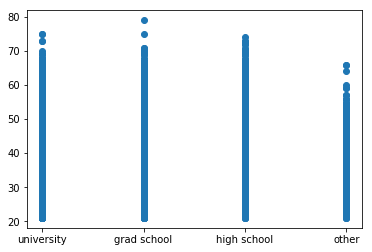

In [10]:
# Scatte rplot Age and Education

a = cc['AGE']
e = cc['EDUCATION']

plt.scatter(e, a)
plt.show()

In [163]:
#Print Headers

header = cc.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAST_PAY1',
       'PAST_PAY2', 'PAST_PAY3', 'PAST_PAY4', 'PAST_PAY5', 'PAST_PAY6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'DEFAULTED'],
      dtype='object')


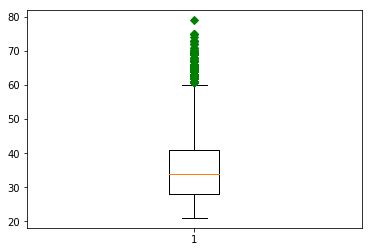

In [7]:
#BOXPLOT

A = cc['AGE']
plt.boxplot(A, 0, 'gD')
plt.show()

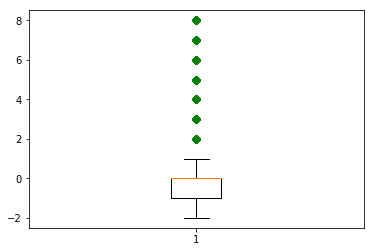

In [12]:
#BOXPLOT Past_Pay1
A = cc['PAST_PAY1']
plt.boxplot(A, 0, 'gD')
plt.show()

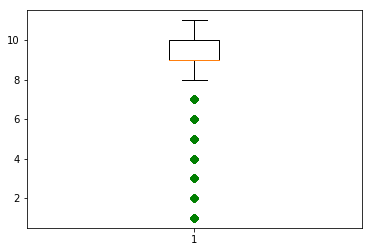

In [11]:
#ccORD boxplot pastpay1
B = ccORD['PAST_PAY_1']
plt.boxplot(B, 0, 'gD')
plt.show()

In [8]:
#CORRELATION MATRIX

corrMat = cc.corr()
print(corrMat)

           LIMIT_BAL       AGE  PAST_PAY1  PAST_PAY2  PAST_PAY3  PAST_PAY4  \
LIMIT_BAL   1.000000  0.144713  -0.271214  -0.296382  -0.286123  -0.267460   
AGE         0.144713  1.000000  -0.039447  -0.050148  -0.053048  -0.049722   
PAST_PAY1  -0.271214 -0.039447   1.000000   0.672164   0.574245   0.538841   
PAST_PAY2  -0.296382 -0.050148   0.672164   1.000000   0.766552   0.662067   
PAST_PAY3  -0.286123 -0.053048   0.574245   0.766552   1.000000   0.777359   
PAST_PAY4  -0.267460 -0.049722   0.538841   0.662067   0.777359   1.000000   
PAST_PAY5  -0.249411 -0.053826   0.509426   0.622780   0.686775   0.819835   
PAST_PAY6  -0.235195 -0.048773   0.474553   0.575501   0.632684   0.716449   
BILL_AMT1   0.285430  0.056239   0.187068   0.234887   0.208473   0.202812   
BILL_AMT2   0.278314  0.054283   0.189859   0.235257   0.237295   0.225816   
BILL_AMT3   0.283236  0.053710   0.179785   0.224146   0.227494   0.244983   
BILL_AMT4   0.293988  0.051353   0.179125   0.222237   0.227202 

In [19]:
#Export corrMat
corrMat.to_csv('corrMat1.csv')

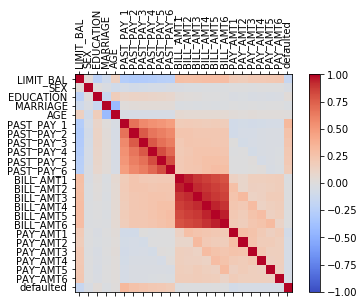

In [8]:
#Visulaize and remove high coreelated features

corrMatNUM = cc1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corrMatNUM,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corrMatNUM.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corrMatNUM.columns)
ax.set_yticklabels(corrMatNUM.columns)
plt.show()




In [52]:
#COVARIANCE 

covMat = cc1.cov()
print(covMat)

#export
covMat.to_csv('covMat.csv')

               LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL   1.683446e+10  1571.050630 -22474.028945 -7323.669658   
SEX         1.571051e+03     0.239247      0.005502    -0.008014   
EDUCATION  -2.247403e+04     0.005502      0.624651    -0.059184   
MARRIAGE   -7.323670e+03    -0.008014     -0.059184     0.272452   
AGE         1.730767e+05    -0.409726      1.275380    -1.992764   
PAST_PAY_1 -3.954593e+04    -0.031685      0.093584     0.011683   
PAST_PAY_2 -4.603765e+04    -0.041442      0.115025     0.015122   
PAST_PAY_3 -4.443225e+04    -0.038694      0.107861     0.020421   
PAST_PAY_4 -4.057181e+04    -0.034411      0.100528     0.020213   
PAST_PAY_5 -3.667056e+04    -0.030521      0.087340     0.021074   
PAST_PAY_6 -3.509308e+04    -0.024754      0.074816     0.020616   
BILL_AMT1   2.727020e+09 -1211.694332   1372.377644  -902.154685   
BILL_AMT2   2.570130e+09 -1085.595467   1054.657595  -802.517866   
BILL_AMT3   2.548533e+09  -833.207432    712.664

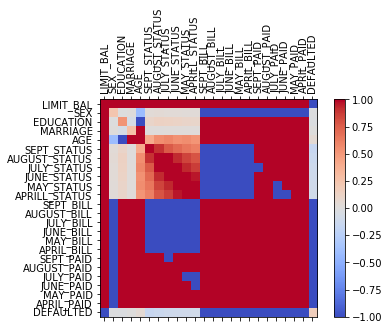

In [15]:
#Visulaize and remove high coreelated features

covMatNUM = ccORD.cov()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(covMatNUM,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(covMatNUM.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(covMatNUM.columns)
ax.set_yticklabels(covMatNUM.columns)
plt.show()

In [16]:
#Comparing attribute values

pastpay1 = ccORD.groupby('SEPT_STATUS')['SEPT_STATUS'].count()
pastpay1


SEPT_STATUS
1        19
2         9
3        11
4        26
5        76
6       322
7      2667
8      3688
9     14737
10     5686
11     2759
Name: SEPT_STATUS, dtype: int64

In [17]:
#Past_Pay_1 ccORD
pastpay1ccORD = ccORD.groupby('PAST_PAY_1')['PAST_PAY_1'].count()
pastpay1ccORD

PAST_PAY_1
1        19
2         9
3        11
4        26
5        76
6       322
7      2667
8      3688
9     14737
10     5686
11     2759
Name: PAST_PAY_1, dtype: int64

In [13]:
#compare education
education = cc.groupby('EDUCATION')['EDUCATION'].count()
education

EDUCATION
grad school    10585
high school     4917
other            468
university     14030
Name: EDUCATION, dtype: int64

In [15]:
#education ccORD
educationccORD = ccORD.groupby('EDUCATION')['EDUCATION'].count()
educationccORD

EDUCATION
1     4917
2    14030
3    10585
4      468
Name: EDUCATION, dtype: int64

In [77]:
#Comparing attribute values

cc.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [166]:
#Comparing attribute values
cc.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0      468
1    10585
2    14030
3     4917
Name: EDUCATION, dtype: int64

In [79]:
#Comparing attribute values
cc.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

c:\users\riley barrow\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


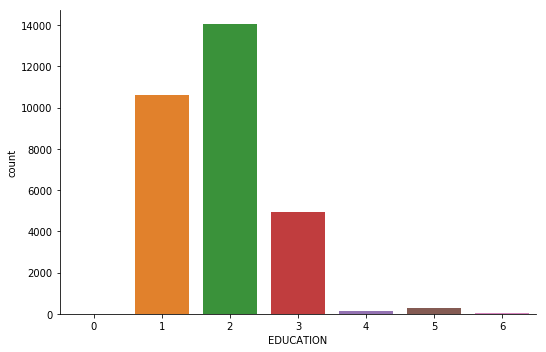

In [80]:
#Plot the education levels 

fg = sns.factorplot('EDUCATION', data = cc, kind = 'count', aspect = 1.5)
fg.set_xlabels('EDUCATION')

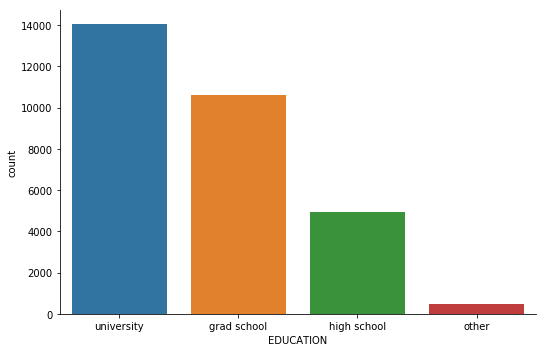

In [55]:
#Plot the education levels 
#updated code with 'catplot' instead of 'factorplot'

fg = sns.catplot('EDUCATION', data = cc, kind = 'count', aspect = 1.5)
fg.set_xlabels('EDUCATION')

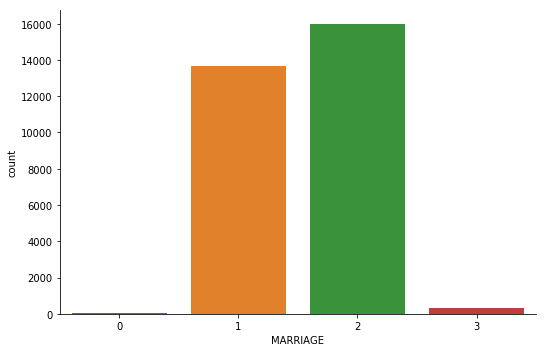

In [82]:
fg1 = sns.catplot('MARRIAGE', data = cc, kind = 'count', aspect = 1.5)
fg1.set_xlabels('MARRIAGE')

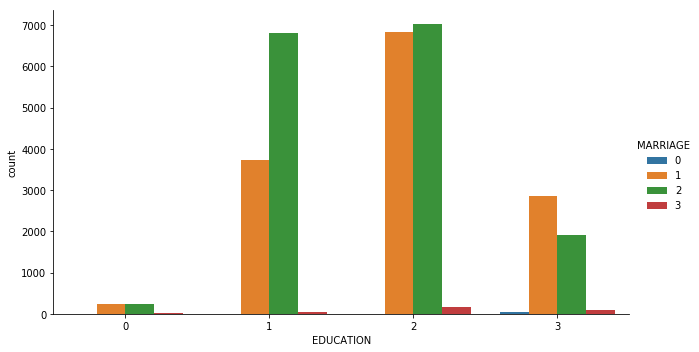

In [168]:
#Use seaborn to group by Marriage Status and Education

fg2 = sns.catplot('EDUCATION', data = cc, hue = 'MARRIAGE', kind = 'count', aspect = 1.75)
fg2.set_xlabels('EDUCATION')

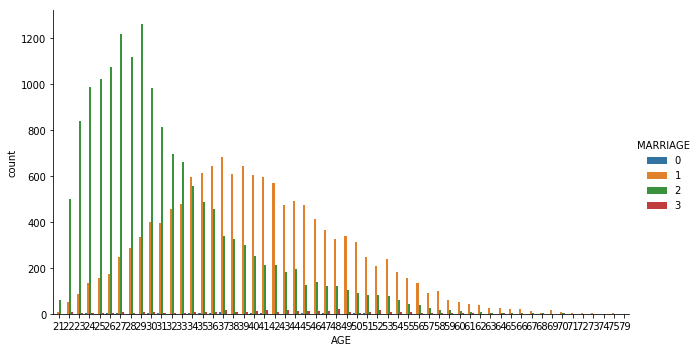

In [99]:
#Use seaborn to group by Marriage Status and Age
fg3 = sns.catplot('AGE', data = cc, hue = 'MARRIAGE', kind = 'count', aspect = 1.75)


In [103]:
#number of customers who defaulted by education level and marriage status 
cc.pivot_table('DEFAULTED', 'EDUCATION', 'MARRIAGE', aggfunc=np.sum, margins = True)

MARRIAGE,0,1,2,3,All
EDUCATION,,,,,
0,NaN,0.0,0.0,NaN,0
1,0.0,769.0,1254.0,13.0,2036
2,1.0,1666.0,1619.0,44.0,3330
3,4.0,754.0,452.0,27.0,1237
4,NaN,3.0,4.0,0.0,7
5,NaN,9.0,9.0,0.0,18
6,NaN,5.0,3.0,0.0,8
All,5.0,3206.0,3341.0,84.0,6636


In [9]:
#create an object for customer who did not default
not_default = cc[cc['DEFAULTED']==0]
default = cc[cc['DEFAULTED']==1]

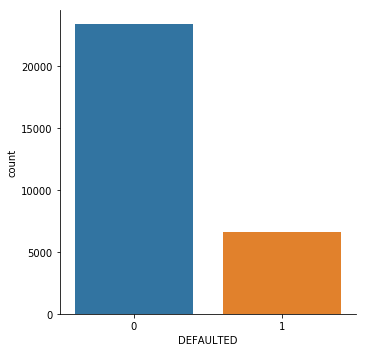

In [10]:
#Factor plot of those who defaulted and those who did not default

sns.catplot('DEFAULTED', data = cc, kind = 'count')

In [11]:
#total number of customers who did not default
len(not_default)

23364

In [12]:
len(default)

6636

In [121]:
#customers who defaulted and who didn't default grouped by marriage status and education
table = pd.crosstab(index=[cc.DEFAULTED,cc.EDUCATION], columns=[cc.SEX, cc.MARRIAGE])


In [122]:
table.unstack()

SEX          1                                                     ...      2  \
MARRIAGE     0                                   1                 ...      2   
EDUCATION    0    1    2     3    4    5    6    0       1       2 ...      4   
DEFAULTED                                                          ...          
0          0.0  1.0  1.0  10.0  0.0  0.0  0.0  2.0  1300.0  1727.0 ...   43.0   
1          NaN  0.0  0.0   2.0  0.0  0.0  0.0  NaN   390.0   643.0 ...    2.0   

SEX                                                         
MARRIAGE                3                                   
EDUCATION     5    6    0     1     2     3    4    5    6  
DEFAULTED                                                   
0          74.0  7.0  0.0  17.0  74.0  51.0  2.0  2.0  2.0  
1           7.0  3.0  NaN   3.0  25.0  16.0  0.0  0.0  0.0  

[2 rows x 56 columns]

In [116]:
table.columns, table.index

(MultiIndex(levels=[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3]],
            labels=[[0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6], [1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]],
            names=['EDUCATION', 'MARRIAGE']),
 MultiIndex(levels=[[0, 1], [1, 2]],
            labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
            names=['DEFAULTED', 'SEX']))

In [126]:
# Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Other', 'Married', 'Single', 'Divorce'], level=1, inplace=True)
table

SEX                 Female                         Male                       
MARRIAGE             Other Married Single Divorce Other Married Single Divorce
DEFAULTED EDUCATION                                                           
0         0              0       2      6       0     0       2      4       0
          1              1    1300   2127      20     3    1653   3428      17
          2              1    1727   2194      44     4    3449   3207      74
          3             10     745    665      25    30    1362    792      51
          4              0      16     21       1     0      33     43       2
          5              0      44     44       1     0      97     74       2
          6              0      10     11       0     0      13      7       2
1         1              0     390    506      10     0     379    748       3
          2              0     643    746      19     1    1023    873      25
          3              2     303    229      11     2     451    223      16
          4              0       2      2       0     0       1      2       0
          5              0       4      2       0     0       5      7       0
          6              0       4      0       0     0       1      3       0

In [128]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively'%(cc.AGE.mean(), 
                                                                           cc.AGE.median()))

Average and median age of passengers are 35 and 34 years old, respectively


In [129]:
#describe AGE

cc.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [130]:
#drop missing values for the records in which age passenger is missing
age = cc['AGE'].dropna()

c:\users\riley barrow\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Customers Ages')

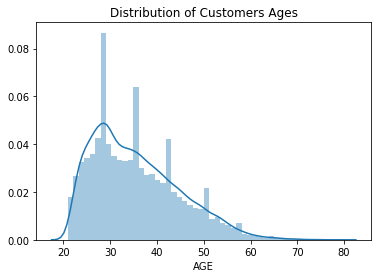

In [131]:
#Distribution of age, with an overlay of a density plot
age = cc['AGE'].dropna()
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers Ages")

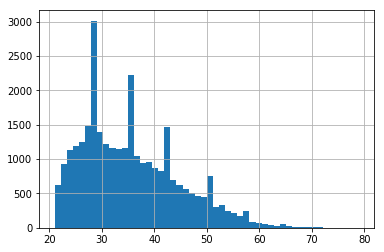

In [132]:
#Another way to plot histogram of age
cc['AGE'].hist(bins=50)

In [23]:
#create a function to identify male/female
def male_female(passenger):
    SEX = passenger
    
    if SEX > 1.5:
        return female
    else:
        return male

##-OR-##

In [39]:
#Change the names of the values in certain attributes, within the attribute column in excel (SEX, EDUCATION, MARRIAGE)

cc['SEX'] = cc['SEX'].astype(object)
pd.factorize(cc.SEX)
cc['SEX'] = 

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Int64Index([2, 1], dtype='int64'))

In [19]:
#Value Counts
cc['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

In [146]:
cc[:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAST_PAY1,PAST_PAY2,PAST_PAY3,PAST_PAY4,PAST_PAY5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


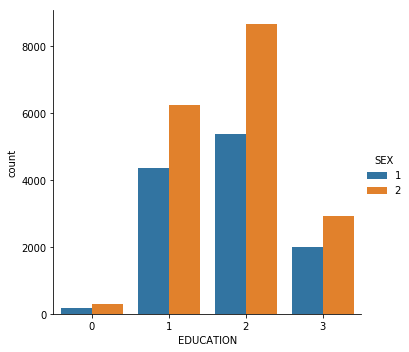

In [169]:
#do a factorplt of customers sex, marriage status, and education
sns.catplot('EDUCATION', data = cc, kind = 'count', hue = 'SEX')

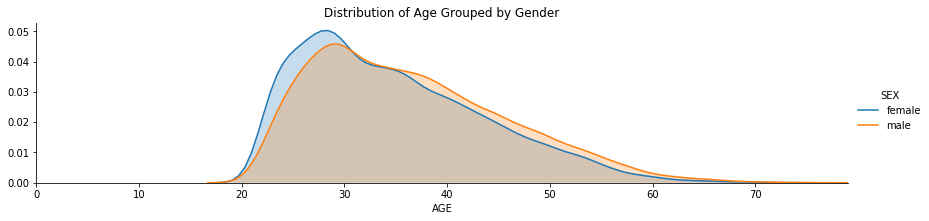

In [43]:
#kde plot, Distribution of Passengers' Age
#Grouped by Gender

fig = sns.FacetGrid(cc, hue = 'SEX', aspect = 4)
fig.map(sns.kdeplot, 'AGE', shade = True)
oldest = cc['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

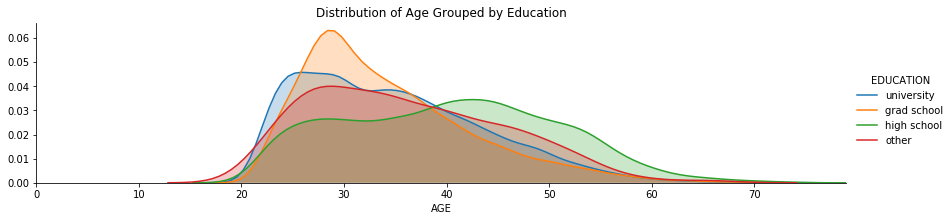

In [54]:
#kde plot, Distibution of Passenger Education

fig1 = sns.FacetGrid(cc, hue = 'EDUCATION', aspect = 4)
fig1.map(sns.kdeplot, 'AGE', shade = True)
oldest1 = cc['AGE'].max()
fig1.set(xlim=(0, oldest1))
fig1.set(title='Distribution of Age Grouped by Education')
fig1.add_legend()

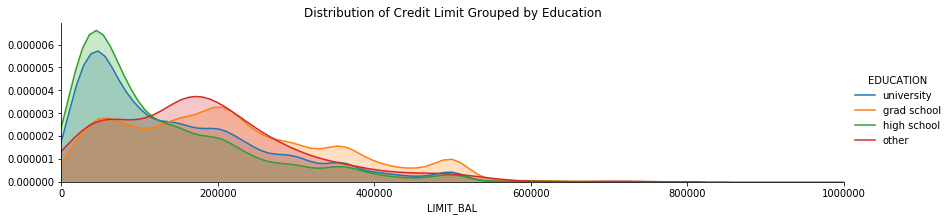

In [72]:
#kdeplot, Distribution of Credit Limit by Education 

fig2 = sns.FacetGrid(cc, hue = 'EDUCATION', aspect = 4)
fig2.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest2 = cc['LIMIT_BAL'].max()
fig2.set(xlim=(0, oldest2))
fig2.set(title='Distribution of Credit Limit Grouped by Education')
fig2.add_legend()

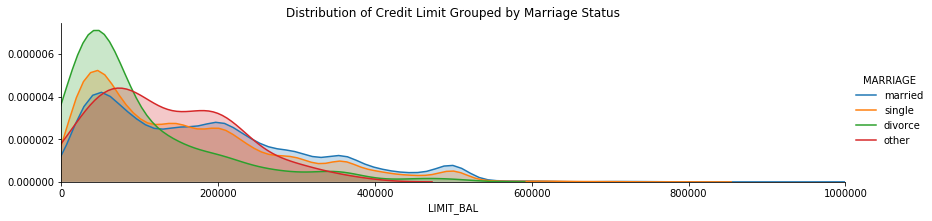

In [53]:
#kdeplot, Distribution of Credit Limit by MArriage Status 

fig3 = sns.FacetGrid(cc, hue = 'MARRIAGE', aspect = 4)
fig3.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest3 = cc['LIMIT_BAL'].max()
fig3.set(xlim=(0, oldest3))
fig3.set(title='Distribution of Credit Limit Grouped by Marriage Status')
fig3.add_legend()

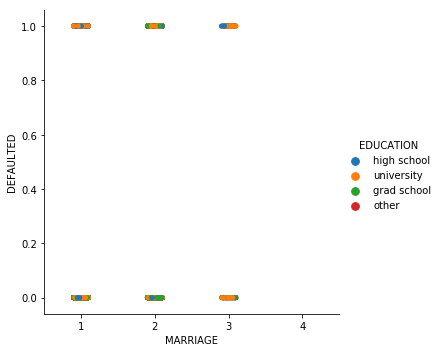

In [83]:
## Defaulted vs. Marriage Status grouped by Education

#change Marriage back to number to plot
credit1 = pd.read_csv('defaultccMARRIAGEnum.csv', header = 0)

sns.catplot(x = 'MARRIAGE', y ='DEFAULTED', hue = 'EDUCATION', data = credit1, order = range(1,5),
            hue_order = ['high school', 'university', 'grad school', 'other'])

In [95]:
#Discretize Credit Limit into 4 bins of 25% percentiles

#set up bins
bin = [10000, 50000, 140000, 240000, 1000000]
#use pd.cut function can attribute the values into specific bins
category = pd.cut(cc.LIMIT_BAL, bin)
category = category.to_frame()

#concatenate age and its bin 
cc_new = pd.concat([cc, category], axis = 1)


#ERROR, look into how to execute pd.cut

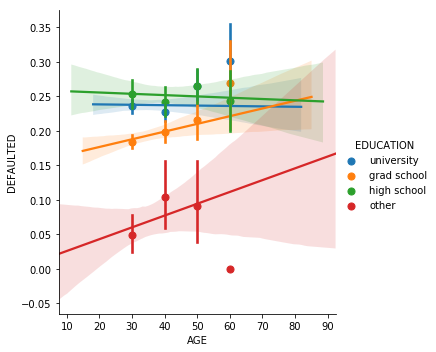

In [44]:
#Create Age bins

generations = [30, 40, 50, 60]
sns.lmplot('AGE', 'DEFAULTED', hue='EDUCATION', data=cc, x_bins=generations)

In [38]:
print(cc_new)


       LIMIT_BAL     SEX    EDUCATION MARRIAGE  AGE  PAST_PAY1  PAST_PAY2  \
0          20000  female   university  married   24          2          2   
1         120000  female   university   single   26         -1          2   
2          90000  female   university   single   34          0          0   
3          50000  female   university  married   37          0          0   
4          50000    male   university  married   57         -1          0   
5          50000    male  grad school   single   37          0          0   
6         500000    male  grad school   single   29          0          0   
7         100000  female   university   single   23          0         -1   
8         140000  female  high school  married   28          0          0   
9          20000    male  high school   single   35         -2         -2   
10        200000  female  high school   single   34          0          0   
11        260000  female  grad school   single   51         -1         -1   

In [89]:
cc_new.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAST_PAY1,PAST_PAY2,PAST_PAY3,PAST_PAY4,PAST_PAY5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED,LIMIT_BAL
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,"(10000, 50000]"
1,120000,female,university,single,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,"(50000, 140000]"
2,90000,female,university,single,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,"(50000, 140000]"
3,50000,female,university,married,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,"(10000, 50000]"
4,50000,male,university,married,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,"(10000, 50000]"


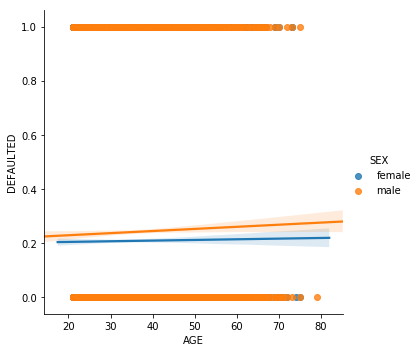

In [7]:
#linear plot of age vs Defaulted

sns.lmplot('AGE', 'DEFAULTED', data=cc, hue = 'SEX')

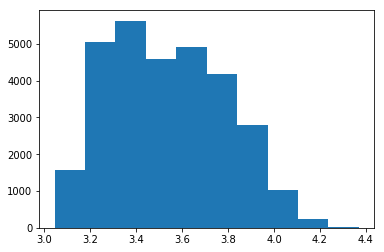

In [40]:
#Guassian curve manufactured for Age 

# histogram plot of a low res sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from numpy import exp
from scipy.stats import boxcox
# seed the random number generator
seed(1)

#define data
data1 = cc.AGE
#power transform
data = boxcox(data1, 0)

#transform to be expoential 
#data = exp(data1)

pyplot.hist(data)
pyplot.show()

In [5]:
##RFE - Recursive Feature Elimination

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import datasets

svm = LinearSVC()
# create the RFE model for the svm classifer and select attributes
rfe = RFE(svm, 24)
rfe = rfe.fit(ccORD, ccORD.DEFAULTED)

# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


c:\users\riley barrow\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


c:\users\riley barrow\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


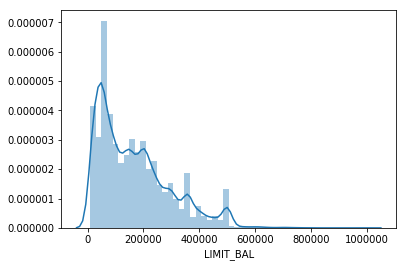

In [18]:
#Plotting univariate Distirbution
sns.distplot(cc.LIMIT_BAL)


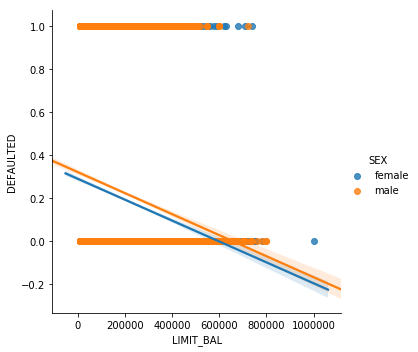

In [34]:
#linear plot of age vs Defaulted

sns.lmplot('LIMIT_BAL', 'DEFAULTED', data=cc, hue = 'SEX')

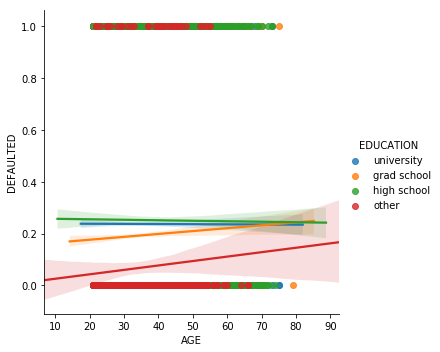

In [20]:
#linear plot of age vs Defaulted

sns.lmplot('AGE', 'DEFAULTED', data=cc, hue = 'EDUCATION')

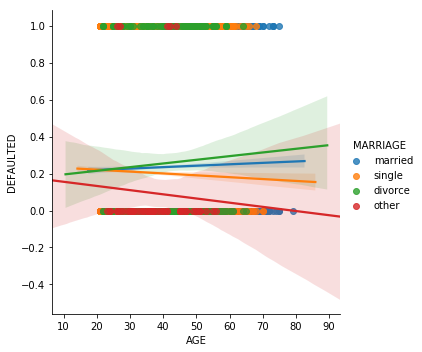

In [47]:
#linear plot of age vs Defaulted

sns.lmplot('AGE', 'DEFAULTED', data=cc, hue = 'MARRIAGE')

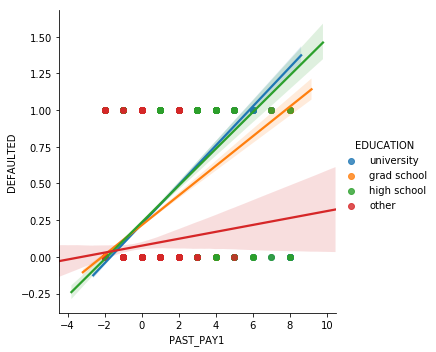

In [23]:
sns.lmplot('PAST_PAY1', 'DEFAULTED', data=cc, hue = 'EDUCATION')

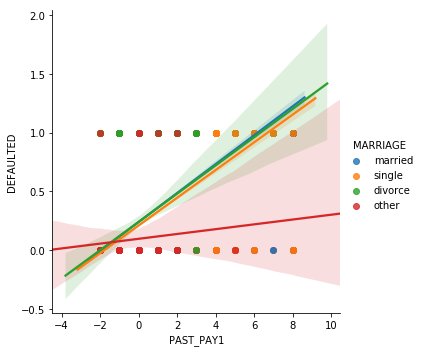

In [50]:
sns.lmplot('PAST_PAY1', 'DEFAULTED', data=cc, hue = 'MARRIAGE')

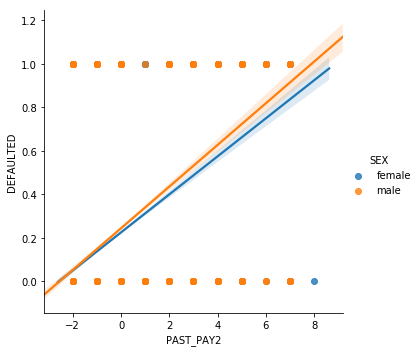

In [49]:
sns.lmplot('PAST_PAY2', 'DEFAULTED', data=cc, hue = 'SEX')

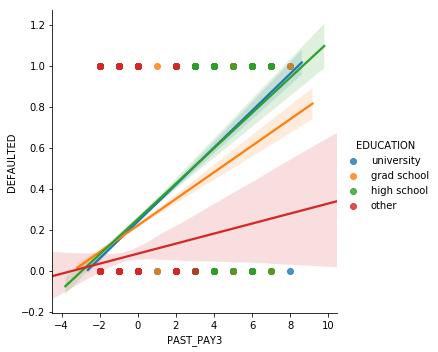

In [25]:
sns.lmplot('PAST_PAY3', 'DEFAULTED', data=cc, hue = 'EDUCATION')

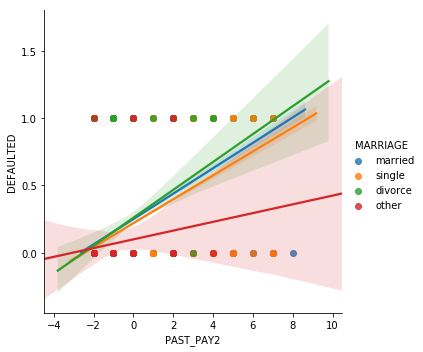

In [31]:
sns.lmplot('PAST_PAY2', 'DEFAULTED', data=cc, hue = 'MARRIAGE')